In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [23]:
germanCredit = pd.read_csv("GermanCredit.csv")
germanCredit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


# Preprocessing

## 1

In [24]:
def drop_n_cols(df, n):
    """
    Input: df, n columns to drop
    Replace all none values with NaN and sum na values over all columns. 
    Find the nlargest, break ties by first.
    Extract the index and convert to an array to drop the columns and return new df.
    """
    headers = list(df)
    revisedData = df.replace('none', np.NaN)
    series = revisedData.isna().sum()
    dropSeries = series.nlargest(n, keep = "first")
    dropArr = dropSeries.index.values
    return df.drop(dropArr, axis=1)

gc_df = drop_n_cols(germanCredit, 3)
gc_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


## 2 

In [25]:
gc_df = gc_df.applymap(lambda s: s.strip('\'') if type(s) == str else s)
gc_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


## 3

In [26]:
checking_dict = {
                "no checking" : 'No Checking', 
                "<0" : 'Low', 
                "0<=X<200": 'Medium', 
                ">=200" : 'High'
                }
gc_df = gc_df.replace({"checking_status":checking_dict})
gc_df 

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


# 4 

In [27]:
savings_dict = {
                "no known savings" : 'No Savings', 
                "<100" : 'Low', 
                "100<=X<500": 'Medium', 
                "500<=X<1000" : 'High',
                ">=1000" : 'High',
                }
gc_df = gc_df.replace({"savings_status" : savings_dict})
gc_df 

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


# 5

In [28]:
class_dict = {"good" : "1", 
              "bad" : "0"}
gc_df = gc_df.replace({"class" : class_dict})
gc_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [29]:
gc_df["employment"].unique()

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

In [31]:
employment_dict = {
                "unemployed" : 'Unemployed', 
                "<1" : 'Amateur',  
                "1<=X<4" : 'Experienced',
                "4<=X<7": 'Professional',
                ">=7" : 'Expert',
                }
gc_df = gc_df.replace({"employment" : employment_dict})
gc_df 

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Experienced,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Professional,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Professional,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Experienced,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Professional,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Experienced,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Experienced,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


# Analysis

## 1

In [30]:
pd.crosstab(gc_df["foreign_worker"], gc_df["employment"])

employment,1<=X<4,4<=X<7,<1,>=7,unemployed
foreign_worker,,,,,
no,16,7,9,5,0
yes,323,167,163,248,62


In [13]:
pd.crosstab(gc_df["savings_status"], gc_df["class"])

class,0,1
savings_status,,
High,17,94
Low,217,386
Medium,34,69
No Savings,32,151


## 2 

In [21]:
single = gc_df[gc_df["personal_status"] == "male single"]
single_profess = single[single["employment"] == "Professional"]
mean = single_profess["credit_amount"].mean()


txt = "The average credit amount of single males defined as Professionals with 4 - 7 years of work experience is {0}.".format(mean)
print(txt)

The average credit amount of single males defined as Professionals with 4 - 7 years of work experience is 4142.592592592592.


## 3

In [32]:
gc_df["job"].unique()

array(['skilled', 'unskilled resident', 'high qualif/self emp/mgmt',
       'unemp/unskilled non res'], dtype=object)

In [33]:
for i in gc_df["job"].unique():
    mean = gc_df[gc_df["job"] == i]["credit_amount"].mean()
    txt = "The average credit amount of individuals in a(n) {0} job has an average credit amount of {1}.".format(i, mean)
    print(txt)


The average credit amount of individuals in a(n) skilled job has an average credit amount of 3070.9650793650794.
The average credit amount of individuals in a(n) unskilled resident job has an average credit amount of 2358.52.
The average credit amount of individuals in a(n) high qualif/self emp/mgmt job has an average credit amount of 5435.493243243243.
The average credit amount of individuals in a(n) unemp/unskilled non res job has an average credit amount of 2745.1363636363635.


## 4

In [61]:
ed = gc_df[gc_df["purpose"] == "education"]

checking = ed.checking_status.mode().item()
saving = ed.savings_status.mode().item()

checkingtxt = "Most common checking status: {0}.".format(checking)
savingtxt = "Most common savings status: {0}.".format(saving)

print(checkingtxt)
print(savingtxt)

Most common checking status: No Checking.
Most common savings status: Low.


## Visualization

## 1

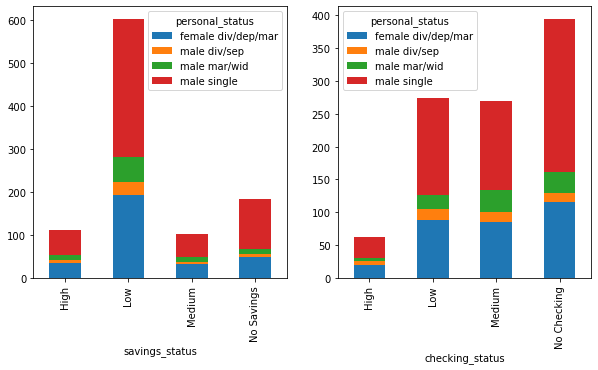

In [103]:
fig, axes = plt.subplots(ncols = 2, figsize=(10, 5))
ax1 = pd.crosstab(gc_df['savings_status'], gc_df['personal_status']).plot(kind='bar', stacked=True, ax = axes[0])
ax2 = pd.crosstab(gc_df['checking_status'], gc_df['personal_status']).plot(kind='bar', stacked=True, ax = axes[1])

## 2

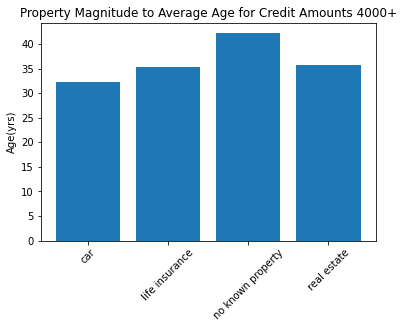

In [97]:
cred4000 = gc_df[gc_df["credit_amount"] > 4000]
datapts = cred4000.groupby('property_magnitude')['age'].mean()

names = datapts.index
heights = datapts.to_numpy()

plt.title("Property Magnitude to Average Age for Credit Amounts 4000+")
plt.ylabel("Age(yrs)")
plt.bar(names, heights) 
plt.xticks(rotation = 45)
plt.show()

## 3

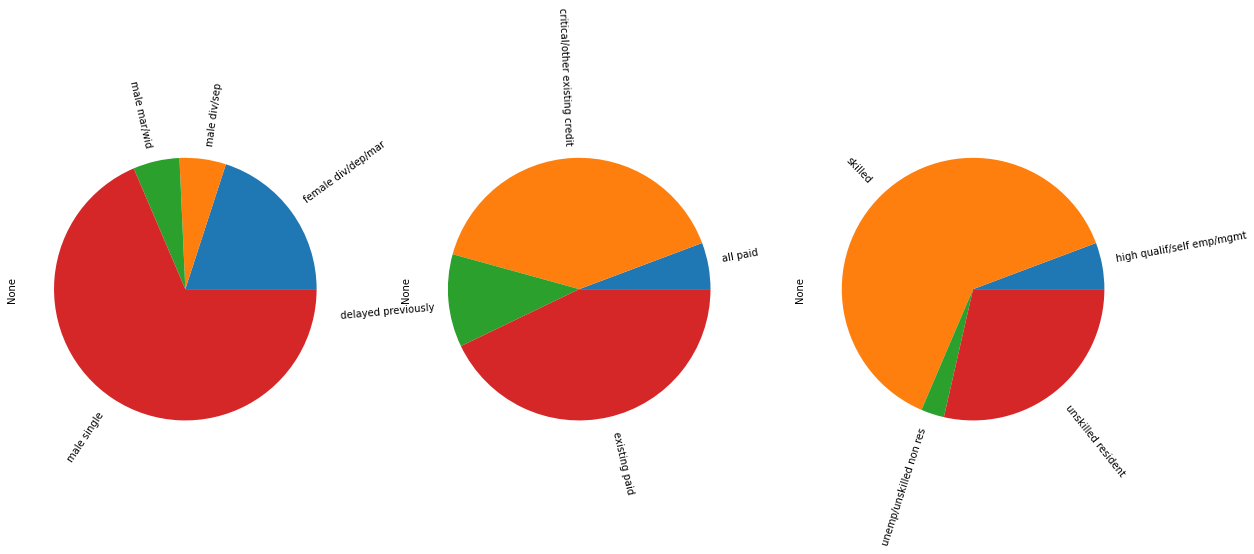

In [114]:
high = gc_df[gc_df["savings_status"] == "High"]
high40 = high[high["age"] > 40]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (20,30))

high40.groupby('personal_status').size().plot(kind='pie', ax=ax1, rotatelabels=True)
high40.groupby('credit_history').size().plot(kind='pie', ax=ax2, rotatelabels=True)
high40.groupby('job').size().plot(kind='pie', ax=ax3, rotatelabels=True)

plt.show()